WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (30309) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (30309) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (64274) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (64274) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (68412) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (68412) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-z

[*********************100%%**********************]  1 of 1 completed


      Ativo Total  Ativo Circulante  Caixa e Equivalentes de Caixa  \
0       -0.004402          0.082509                       0.540941   
1       42.823044        154.470551                      59.403415   
2        0.014976          0.034944                       0.078755   
3        0.151882          0.640439                       1.334113   
4       -0.078297         -0.201158                      -0.353510   
...           ...               ...                            ...   
1877     0.031644          0.028168                      -0.481838   
1878    -0.039680         -0.113458                       0.216463   
1879     0.385180          1.257939                      -0.151743   
1880     0.217202         -0.085474                       0.964492   
1881     0.012556         -0.017423                       0.233211   

      Aplicações Financeiras  Contas a Receber_1  Estoques_1  \
0                   0.000000           -0.855514    0.000000   
1                   1.000000   

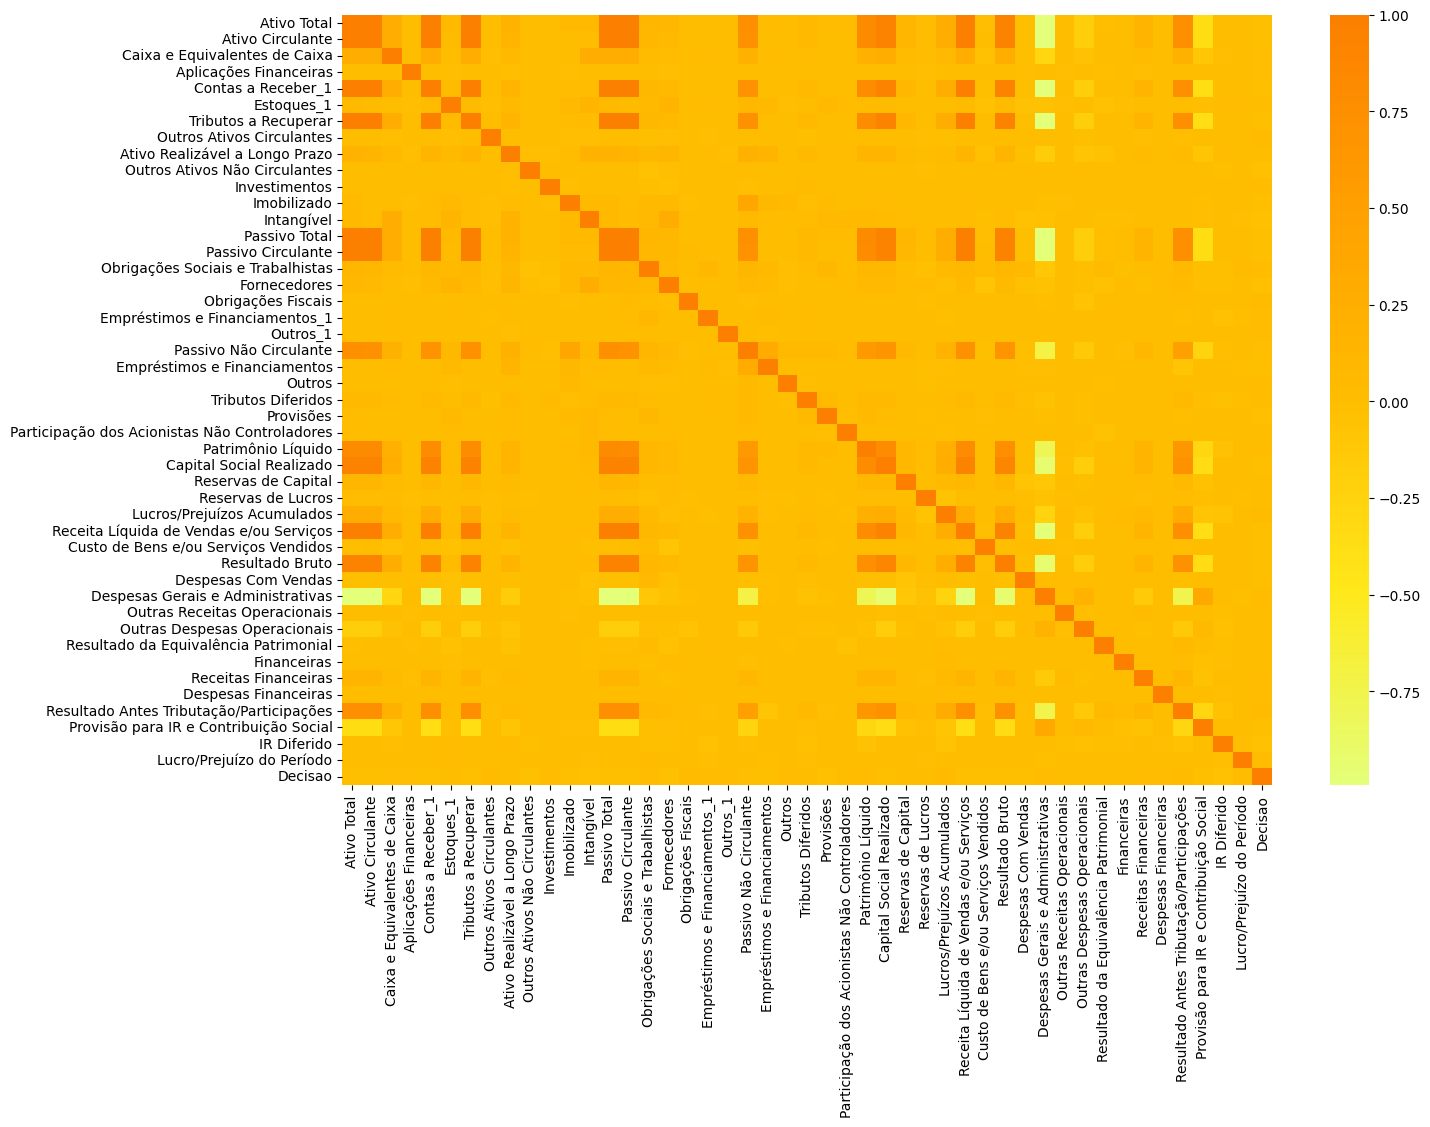

correlacao encontrada, Ativo Circulante e Ativo Total,VALOR: 0.9936191613034182
correlacao encontrada, Contas a Receber_1 e Ativo Total,VALOR: 0.9897313992744241
correlacao encontrada, Tributos a Recuperar e Ativo Total,VALOR: 0.9911861955025305
correlacao encontrada, Passivo Total e Ativo Total,VALOR: 1.0
correlacao encontrada, Passivo Circulante e Ativo Total,VALOR: 0.9856898107136653
correlacao encontrada, Patrimônio Líquido e Ativo Total,VALOR: 0.8121568265673584
correlacao encontrada, Capital Social Realizado e Ativo Total,VALOR: 0.9407784719550619
correlacao encontrada, Receita Líquida de Vendas e/ou Serviços e Ativo Total,VALOR: 0.991369135249478
correlacao encontrada, Resultado Bruto e Ativo Total,VALOR: 0.9357493661129012
correlacao encontrada, Despesas Gerais e Administrativas e Ativo Total,VALOR: 0.9844249841100213
correlacao encontrada, Contas a Receber_1 e Ativo Circulante,VALOR: 0.9951703200197722
correlacao encontrada, Tributos a Recuperar e Ativo Circulante,VALOR: 0.997

In [3]:
import pandas as pd
import os
import numpy as np

# EMPRESAS
empresas = ["ABEV3", "AZUL4", "BTOW3", "B3SA3", "BBSE3", "BRML3", "BBDC4", "BRAP4", "BBAS3", "BRKM5", "BRFS3", "BPAC11", "CRFB3", "CCRO3", "CMIG4", "HGTX3", "CIEL3", "COGN3", "CPLE6", "CSAN3", "CPFE3", "CVCB3", "CYRE3", "ECOR3", "ELET6", "EMBR3", "ENBR3", "ENGI11", "ENEV3", "EGIE3", "EQTL3", "EZTC3", "FLRY3", "GGBR4", "GOAU4", "GOLL4", "NTCO3", "HAPV3", "HYPE3", "IGTA3", "GNDI3", "ITSA4", "ITUB4", "JBSS3", "JHSF3", "KLBN11", "RENT3", "LCAM3", "LAME4", "LREN3", "MGLU3", "MRFG3", "BEEF3", "MRVE3", "MULT3", "PCAR3", "PETR4", "BRDT3", "PRIO3", "QUAL3", "RADL3", "RAIL3", "SBSP3", "SANB11", "CSNA3", "SULA11", "SUZB3", "TAEE11", "VIVT3", "TIMS3", "TOTS3", "UGPA3", "USIM5", "VALE3", "VVAR3", "WEGE3", "YDUQ3"]

# MODELO DE DICIONARIO
# fundamentos = {
#     "ABEV3": balanco_dre_abev3,
#     "MGLU3": balanco_dre_mglu3
# }

fundamentos = {}

# PUXAR ARQUIVOS DA PASTA DE BALANÇOS
arquivos = os.listdir("balancos")
for arquivo in arquivos:
    nome = arquivo[-9:-4]
    if "11" in arquivo:
        nome = arquivo[-10:-4]
    if nome in empresas :
        # PEGAR O BALANÇO DAQUELA EMPRESA            SHEET_NAME É A O NOME OU ORDEM DA PLANILHA NO EXCEL
        balanco = pd.read_excel(f'balancos/{arquivo}',sheet_name=0)
        # NA PRIMEIRA COLUNA COLOCAR O TITULO COM O NOME DA EMPRESA
        balanco.iloc[0,0] = nome
        # PEGAR PRIMEIRA LINHA PARA USAR DE CABEÇALHO
        balanco.columns = balanco.iloc[0]
        balanco = balanco[1:]
        # PEGAR 1ª COLUNA (QUE AGORA TEM O NOME DA EMPRESA) PARA TRANSFORMAR EM INDICE
        balanco = balanco.set_index(nome)

        # TORNAR A PRIMEIRA COLUNA QUE TEM O NOME DA EMPRESA, O INDICE DA TABELA
        dre = pd.read_excel(f'balancos/{arquivo}',sheet_name=1)
        # NA PRIMEIRA COLUNA COLOCAR O TITULO COM O NOME DA EMPRESA
        dre.iloc[0,0] = nome
        # PEGAR PRIMEIRA LINHA PARA USAR DE CABEÇALHO
        dre.columns = dre.iloc[0]
        dre = dre[1:]
        # PEGAR 1ª COLUNA (QUE AGORA TEM O NOME DA EMPRESA) PARA TRANSFORMAR EM INDICE
        dre = dre.set_index(nome)

        # INSERIR CAMPOS DO BALANÇO NA LISTA DE FUNDAMENTOS JUNTO COM DRE
        fundamentos[nome] = pd.concat([balanco,dre])
#         # print(len(fundamentos))

# PEGAR PREÇO DE AÇÕES NAS DATAS CORRESPONDENTES (COTAÇÕES)
cotacoes_df = pd.read_excel('Cotacoes.xlsx')
# print (cotacoes_df)

cotacoes = {}
for empresa in cotacoes_df['Empresa'].unique():
    #INSERIR DADOS DAS EMPRESAS NO DICIONARIO
    cotacoes[empresa] = cotacoes_df.loc[cotacoes_df['Empresa']==empresa,:]
# print(cotacoes['ITSA4'])

# EM UMA ANALISE DE DADOS NÃO PODE CONTER LINHAS VAZIAS, ENTÃO NO CASO DAS COTAÇÕES, IREMOS REMOVER AS LINHAS QUE FOREM VAZIAS (pode ser que a ação não havia existido na epóca)

for empresa in empresas:
    if cotacoes[empresa].isnull().values.any():
        cotacoes.pop(empresa)
        fundamentos.pop(empresa)
empresas = list(cotacoes.keys())
# print(len(empresas))


# print(cotacoes['BRKM5'])
# print('\n=========================================================\n')
# print(fundamentos['BRKM5'])
    

# FUNDAMENTOS: 
            # TROCAR LINHAS POR COLUNAS
for empresa in fundamentos:
    tabela = fundamentos[empresa].T
            # TRATAR AS DATAS PARA FORMATO DE DATA DO PY
    tabela.index = pd.to_datetime(tabela.index,format='%d/%m/%Y')
            # JUNTAR FUNDAMENTOS COM COTAÇÕES COM A COLUNA 'ADJ CLOSE' DAS COTAÇÕES
    tabela_cotacao = cotacoes[empresa].set_index("Date")
    tabela_cotacao = tabela_cotacao[['Adj Close']]

    tabela = tabela.merge(tabela_cotacao,right_index=True,left_index=True)
    tabela.index.name = empresa
    fundamentos[empresa] = tabela
# print(fundamentos["ABEV3"])


#### TRATAR COLUNAS ####
# RETIRAR DA ANALISE COLUNAS QUE NÃO EXISTEM EM ALGUMA TABELA
colunas = list(fundamentos["ABEV3"].columns)
for empresa in empresas:
    if set(colunas) != set(fundamentos[empresa].columns):
        fundamentos.pop(empresa)

# AS COLUNAS QUE ESTIVEREM COM O MESMO NOME, COLOCAR ALGUMA INFORMAÇÃO PARA DEIXAR DIFERENTE E NÃO TER CONFLITO
texto_coluna = ';'.join(colunas)

colunas_modificadas = []
for coluna in colunas:
    if colunas.count(coluna)==2 and coluna not in colunas_modificadas:
        texto_coluna = texto_coluna.replace(";"+coluna+";",";"+coluna+"_1;",1)
        colunas_modificadas.append(coluna)
colunas = texto_coluna.split(";")        


# IMPLEMENTAR AS COLUNAS NAS TABELAS
for empresa in fundamentos:
    fundamentos[empresa].columns = colunas


# ANLAISAR VALORES VAZIOS NAS COLUNAS
# valores_vazios= {
#     "ativo":10,
#     "passivp_total":20,
# }

valores_vazios = dict.fromkeys(colunas,0)
total_linhas = 0

for empresa in fundamentos:
    tabela = fundamentos[empresa]
    total_linhas += tabela.shape[0]
    for coluna in colunas:
        qtd_vazios = pd.isnull(tabela[coluna]).sum()
        valores_vazios[coluna] += qtd_vazios

# CADA COLUNA QUE TIVER ACIMA DE 50 LINHAS VAZIAS,MOSTRE ELAS.
remover_colunas = []
for coluna in valores_vazios:
    if valores_vazios[coluna] >50:
        remover_colunas.append(coluna)
# print(remover_colunas)

# CADA COLUNA QUE TIVER ACIMA DE 50 LINHAS VAZIAS,RETIRE ELAS.
for empresa in fundamentos:
    fundamentos[empresa] = fundamentos[empresa].drop(remover_colunas,axis=1)
    # SE ENCONTRAR VAORES VAZIO ABAIXO DE 50, PREENCHA COM A INFORMAÇÃO QUE ESTA ACIMA
    fundamentos[empresa] = fundamentos[empresa].ffill()




################################ (ETAPA 2 - ANALISE ) Regra: ####################################
# Criando os rotulos: Comprar, Nao Comprar ou Vender?

#### 1. Subiu mais do que o Ibovespa (ou caiu menos) -> Comprar (Valor = 2)
#### 2. Subiu menos do que o lbovespa até Ibovespa - 2% (ou caiu mais do que lbovespa até Ibovespa -2%) -> Não Comprar (Valor = 1)
#### 3. Subiu menos do que o lbovespa - 2% (ou caiu mais do que Ibovespa -2%) -> Vender (Valor = 0) ####

import pandas_datareader.data as pdr
import yfinance as yf

data_inicial = "12/20/2012"
data_final = "04/20/2021"

data_inicial = pd.to_datetime(data_inicial)
data_final = pd.to_datetime(data_final)

# AJUSTE SEMPRE NECESSARIO AO TRATAR DADOS DO YAHOO FINANCE
yf.pdr_override()

# biblioteca para pegar informações da wb
from pandas_datareader import data as web

df_ibov = pdr.get_data_yahoo("^BVSP", start=data_inicial, end=data_final)
# print(df_ibov)

# AJUSTAR DATAS VAZIAS CONTIDAS NO IBOVESPA
datas = fundamentos['ABEV3'].index
# print(datas)  

for data in datas :
    if data not in df_ibov:
        df_ibov.loc[data] = np.nan
# COLOCAR AS DATAS EM ORDEM CRESCENTE
df_ibov = df_ibov.sort_index()
df_ibov = df_ibov.ffill()
# print (df_ibov)

# TROCAR NOME DA COLUNA 'ADJ CLOSE' DO IBOVESPA
df_ibov = df_ibov.rename(columns={'Adj Close':'IBOV'})
# print(df_ibov)

# JUNTAR COLUNA IBOV PARA A TABELA DE FUNDAMENTOS
for empresa in fundamentos:
    fundamentos[empresa] = fundamentos[empresa].merge(df_ibov[['IBOV']],left_index=True,right_index=True)
# print(fundamentos['ABEV3'])



################ TORNAR INDICADORES EM % PERCENTUAL ################
# FUNDAMENTOS% TRIMESTRE = FUNDAMENTOS TRIM / FUNDAMENTOS TRI ANTERIOR
# COTAÇÃO% TRIMESTRE = COTAÇÃO TRI ANTERIOR / COTAÇÃO TRI

for empresa in fundamentos:
    fundamento = fundamentos[empresa]
    fundamento = fundamento.sort_index()
    for coluna in fundamento:
        if "Adj Close" in coluna or "IBOV" in coluna:
            pass
        else:
            # pegar a cotação anterior
            condicoes = [
                (fundamento[coluna].shift(1) > 0) & (fundamento[coluna] < 0),
                (fundamento[coluna].shift(1) < 0) & (fundamento[coluna] > 0),
                (fundamento[coluna].shift(1) < 0) & (fundamento[coluna] < 0),
                (fundamento[coluna].shift(1) == 0) & (fundamento[coluna] > 0),
                (fundamento[coluna].shift(1) == 0) & (fundamento[coluna] < 0),
                (fundamento[coluna].shift(1) < 0) & (fundamento[coluna] == 0),
            ]
            valores = [
                -1,
                1,
                (abs(fundamento[coluna].shift(1)) - abs(fundamento[coluna])) / abs(fundamento[coluna].shift(1)),
                1,
                -1,
                1,
            ]
            fundamento[coluna] = np.select(condicoes, valores, default=fundamento[coluna] / fundamento[coluna].shift(1) - 1)
    # pegar cotação seguinte
    fundamento["Adj Close"] = fundamento["Adj Close"].shift(-1) / fundamento["Adj Close"] - 1
    fundamento["IBOV"] = fundamento["IBOV"].shift(-1) / fundamento["IBOV"] - 1
    fundamento["Resultado"] = fundamento["Adj Close"] - fundamento["IBOV"]
    condicoes = [
        (fundamento["Resultado"] > 0),
        (fundamento["Resultado"] < 0) & (fundamento["Resultado"] >= -0.02),
        (fundamento["Resultado"] < -0.02)
    ]
    valores = [2, 1, 0]
    fundamento["Decisao"] = np.select(condicoes, valores)
    fundamentos[empresa] = fundamento
# print(fundamentos["ABEV3"])


#  REMOVER VALORES VAZIOS
colunas = list(fundamentos[empresa].columns)
valores_vazios = dict.fromkeys(colunas,0)
total_linhas = 0

for empresa in fundamentos:
    tabela = fundamentos[empresa]
    total_linhas += tabela.shape[0]
    for coluna in colunas:
        qtd_vazios = pd.isnull(tabela[coluna]).sum()
        valores_vazios[coluna] += qtd_vazios
# print(valores_vazios)
# print(total_linhas)

remover_colunas = []
for coluna in valores_vazios:
        # SE TIVER MAIS QUE 1/3 DO VALOR, MANDAR PARA LISTA DE REMOÇÃO
    if valores_vazios[coluna] > (total_linhas / 3):
        remover_colunas.append(coluna)
# print(remover_colunas)

for empresa in fundamentos:
    fundamentos[empresa] = fundamentos[empresa].drop(remover_colunas,axis=1)
    # SE ENCONTRAR VAORES VAZIO ABAIXO DE 50, PREENCHA COM A INFORMAÇÃO QUE ESTA ACIMA
    fundamentos[empresa] = fundamentos[empresa].fillna(0)
# print(fundamentos["ABEV3"])

for empresa in fundamentos:
    fundamentos[empresa] = fundamentos[empresa].drop(["Adj Close","IBOV","Resultado"],axis=1)
# print(fundamentos["CMIG4"].shape)


copia_fundamentos = fundamentos.copy()

base_dados = pd.DataFrame()
# REMOVER A PRIMEIRA E ULTIMA LINHA, POIS A PRIMEIRA OLHA O PASSADO E A ULTIMA OLHA O FUTURO
for empresa in copia_fundamentos:
    # PEGANDO DA 2ª LINHA ATÉ A PENULTIMA LINHA
    copia_fundamentos[empresa] = copia_fundamentos[empresa][1:-1]
    copia_fundamentos[empresa] = copia_fundamentos[empresa].reset_index(drop=True)
    base_dados = pd.concat([base_dados, copia_fundamentos[empresa]], ignore_index=True)
print(base_dados)



############ ANÁLISE EXPLORATÓRIA ############
# IMPORTAR BIBLIOTECAS GRAFICAS
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# print(base_dados["Decisao"].value_counts(normalize=True).map("{:.1%}".format))

# EXIBIR GRAFICO
# fig = px.histogram(base_dados,x="Decisao",color="Decisao")
# fig.show()
 
# TIRAR CATEGORIA 1 PARA 0, POQUE A CATEGORIA 1 ESTÁ MUITO DESBALANCEADA
base_dados.loc[base_dados["Decisao"]==1,"Decisao"] = 0
fig = px.histogram(base_dados,x="Decisao",color="Decisao")
fig.show()


# CORRELAÇÃO
correlacao = base_dados.corr()
# print(correlacao)

# GRAFICO DE CALOR
fig, ax = plt.subplots(figsize =(15,10))
sns.heatmap(correlacao,cmap="Wistia",ax=ax)
plt.show()


# REMOVER TODAS AS COLUNAS QUE TEM UMA CORRELAÇÃO ACIMA DE 0.8 (CORRELAÇÃO MUITO ALTA É RUIM PARA UMA ANALISE)
# INDO CASO A CASO, COMEÇANDO PELO *ATIVO TOTAL*
correlacoes_encontradas = []

for coluna in correlacao:
    for linha in correlacao.index:
        if linha != coluna:
            valor = abs(correlacao.loc[linha,coluna])
            if valor >0.8 and (coluna, linha, valor) not in correlacoes_encontradas:
                correlacoes_encontradas.append((linha,coluna,valor))
                print(f'correlacao encontrada, {linha} e {coluna},VALOR: {valor}')


remover = ['Passivo Total']
base_dados = base_dados.drop(remover,axis=1)
# print(base_dados.shape)



################ FEATURE SELECT ################
# Reduzir quantidade de caracteristicas, pq para a IA analisar, será mais preciso com menos caracteristicas
from sklearn.ensemble import ExtraTreesClassifier

modelo = ExtraTreesClassifier(random_state=1)
x = base_dados.drop("Decisao", axis=1)
y = base_dados["Decisao"]
modelo.fit(x, y)

caracteristicas_importantes = pd.DataFrame(modelo.feature_importances_, x.columns).sort_values(by=0, ascending=False)
# print(caracteristicas_importantes)

# SÓ QUERO 10
top10 = list(caracteristicas_importantes.index)[:10]
# print(top10)


############ APLICAÇÃO DE STANDARDSCALER PARA MELHORAR NOSSOS MODELOS DE MACHINE LEARNING ################
from sklearn.preprocessing import StandardScaler

def ajustar_scaler(tabela_original):
    tabela_original["Decisao"] = tabela_original["Decisao"].fillna(0)
    scaler = StandardScaler()
    tabela_auxiliar = tabela_original.drop("Decisao", axis=1)
    
    tabela_auxiliar = pd.DataFrame(scaler.fit_transform(tabela_auxiliar), tabela_auxiliar.index, tabela_auxiliar.columns)
    tabela_auxiliar["Decisao"] = tabela_original["Decisao"]
    return tabela_auxiliar

nova_base_dados = ajustar_scaler(base_dados)
top10.append("Decisao") 

nova_base_dados = nova_base_dados[top10].reset_index(drop=True)
# print(nova_base_dados)


Dummy
              precision    recall  f1-score   support

           0       0.52      0.49      0.50       233
           2       0.53      0.56      0.54       238

    accuracy                           0.52       471
   macro avg       0.52      0.52      0.52       471
weighted avg       0.52      0.52      0.52       471



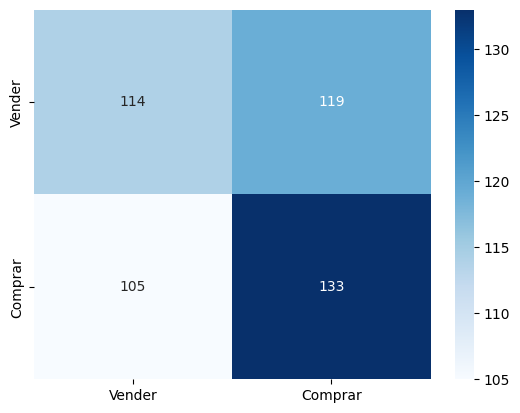

In [17]:

### SEPARAÇÃO DOS DADOS EM TREINO DE TESTE
from sklearn.model_selection import train_test_split

# QUAL SERÁ OS PARAMETROS QUE A IA IRÁ OLHAR?
x = nova_base_dados.drop("Decisao",axis=1)
# QUAL SERÁ A DECISAO QUE EU TENHO QUE TOMAR?
y = nova_base_dados["Decisao"]

# SEPARA DADOS DE X DE TREINO E DADOS DE Y DE TESTE
x_treino,x_teste,y_treino,y_teste = train_test_split(x,y,random_state=1)

# Criação de um Dummy Classifier (Uma baseline para ver se os nossos modelos são melhores do que puro chute)
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report, confusion_matrix

############ Criação de um Dummy Classifier (Uma baseline para ver se os nossos modelos são melhores do que puro chute) ############
dummy = DummyClassifier(strategy="stratified",random_state=8)
dummy.fit(x_treino,y_treino)
previsao_dummy = dummy.predict(x_teste)



############ METRICAS DE AVALIAÇÃO ############
def avaliar(y_teste,previsoes,nome_modelo):
    print(nome_modelo)
    report = classification_report(y_teste,previsoes)
    print(report)
    # TRANSFORMAR NUMEROS EM NOME (COMPRAR OU VENDER)
    cf_matrix = pd.DataFrame(confusion_matrix(y_teste,previsoes),index=["Vender","Comprar"], columns=["Vender","Comprar"])
    sns.heatmap(cf_matrix,annot=True,cmap="Blues",fmt=",")
    plt.show()
    print("="*60,"\n")
    # ELE ESTÁ SAINDO O NUMERO COM DATAÇÃO CIENTIFICA, VAMOS TRANSFORMAR EM CASA DECIMAL (fmt=",")

avaliar(y_teste,previsao_dummy,"Dummy")

In [19]:
# # MODELOS A TESTAR :
# · AdaBoost
# . Decision Tree
# . Random Forest
# · ExtraTree
# · Gradient Boost
# . K Nearest Neighbors (KNN)
# · Logistic Regression
# · Naive Bayes
# · Support Vector Machine (SVM)
# · Rede Neural

from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

modelos = {"AdaBoost": AdaBoostClassifier(random_state=1),
"DecisionTree": DecisionTreeClassifier(random_state=1),
"RandomForest": RandomForestClassifier(random_state=1),
"ExtraTree": ExtraTreesClassifier(random_state=1),
"GradientBoost": GradientBoostingClassifier(random_state=1),
"KNN": KNeighborsClassifier(),
"LogisticRegression": LogisticRegression(random_state=1),
"NaiveBayes": GaussianNB(),
"SVM": SVC(random_state=1),
"RedeNeural": MLPClassifier(random_state=1, max_iter=400),}



AdaBoost
              precision    recall  f1-score   support

           0       0.56      0.53      0.54       233
           2       0.56      0.59      0.57       238

    accuracy                           0.56       471
   macro avg       0.56      0.56      0.56       471
weighted avg       0.56      0.56      0.56       471



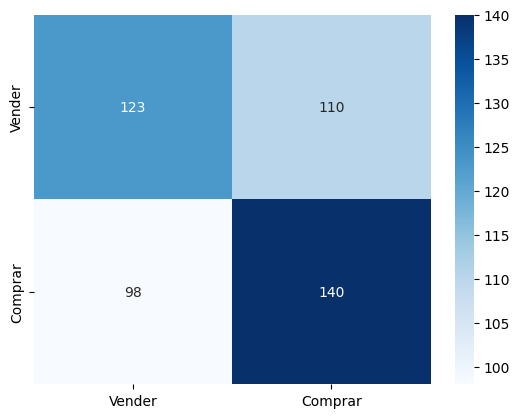


DecisionTree
              precision    recall  f1-score   support

           0       0.53      0.49      0.51       233
           2       0.54      0.58      0.55       238

    accuracy                           0.53       471
   macro avg       0.53      0.53      0.53       471
weighted avg       0.53      0.53      0.53       471



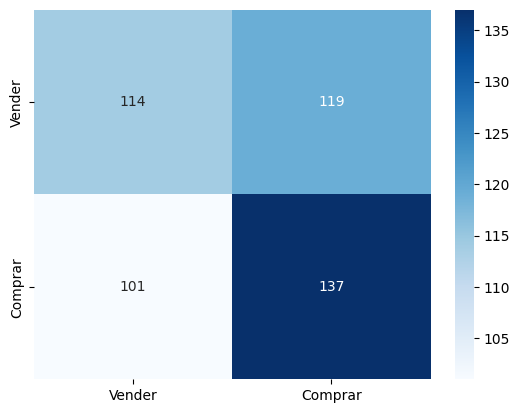


RandomForest
              precision    recall  f1-score   support

           0       0.53      0.50      0.51       233
           2       0.54      0.57      0.55       238

    accuracy                           0.54       471
   macro avg       0.53      0.53      0.53       471
weighted avg       0.53      0.54      0.53       471



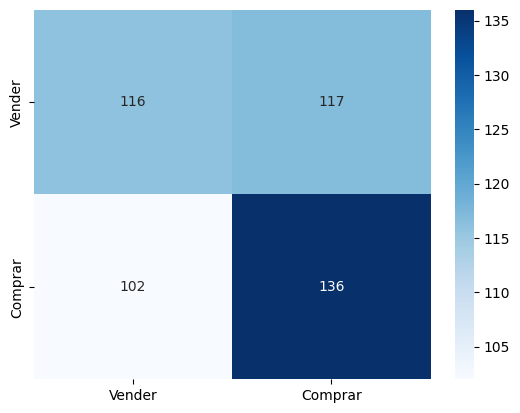


ExtraTree
              precision    recall  f1-score   support

           0       0.55      0.54      0.54       233
           2       0.55      0.56      0.56       238

    accuracy                           0.55       471
   macro avg       0.55      0.55      0.55       471
weighted avg       0.55      0.55      0.55       471



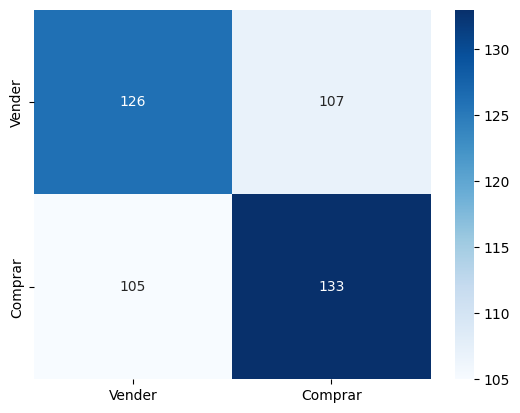


GradientBoost
              precision    recall  f1-score   support

           0       0.55      0.56      0.55       233
           2       0.56      0.54      0.55       238

    accuracy                           0.55       471
   macro avg       0.55      0.55      0.55       471
weighted avg       0.55      0.55      0.55       471



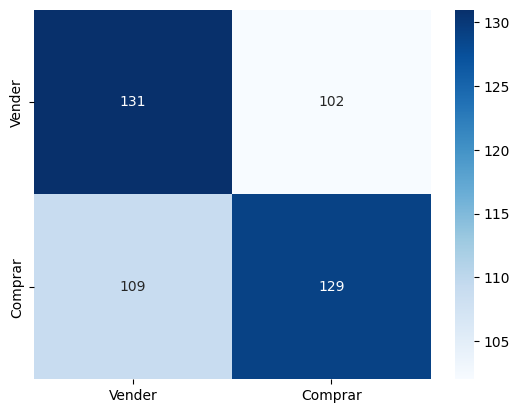


KNN
              precision    recall  f1-score   support

           0       0.54      0.52      0.53       233
           2       0.54      0.56      0.55       238

    accuracy                           0.54       471
   macro avg       0.54      0.54      0.54       471
weighted avg       0.54      0.54      0.54       471



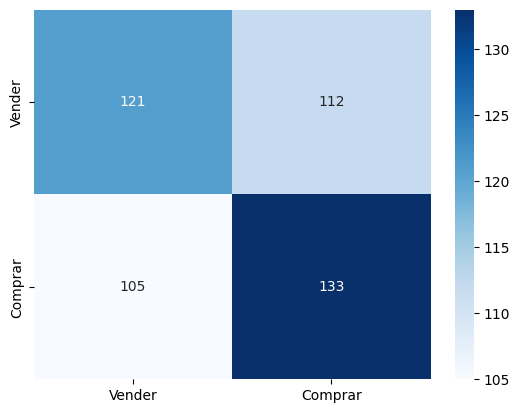


LogisticRegression
              precision    recall  f1-score   support

           0       0.57      0.43      0.49       233
           2       0.55      0.68      0.61       238

    accuracy                           0.56       471
   macro avg       0.56      0.55      0.55       471
weighted avg       0.56      0.56      0.55       471



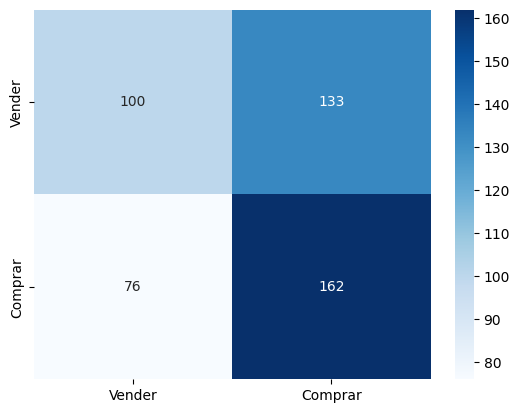


NaiveBayes
              precision    recall  f1-score   support

           0       0.41      0.05      0.08       233
           2       0.50      0.93      0.65       238

    accuracy                           0.49       471
   macro avg       0.45      0.49      0.37       471
weighted avg       0.45      0.49      0.37       471



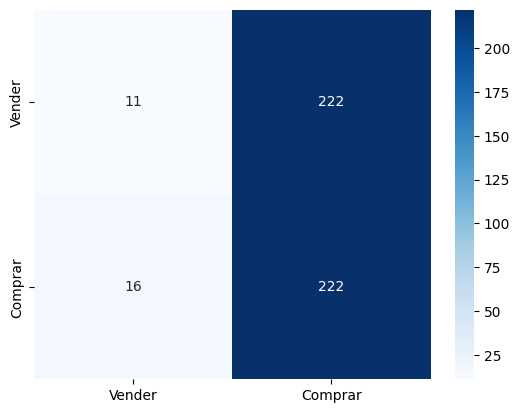


SVM
              precision    recall  f1-score   support

           0       0.56      0.52      0.54       233
           2       0.56      0.60      0.58       238

    accuracy                           0.56       471
   macro avg       0.56      0.56      0.56       471
weighted avg       0.56      0.56      0.56       471



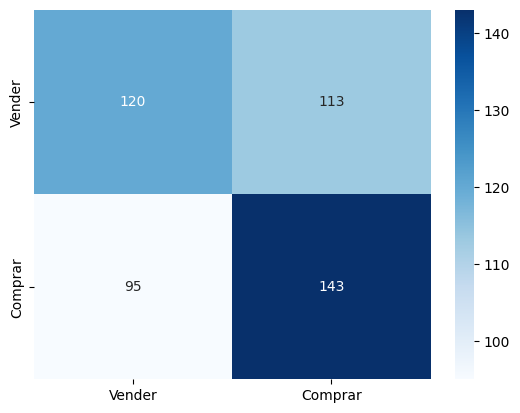


RedeNeural
              precision    recall  f1-score   support

           0       0.53      0.66      0.58       233
           2       0.56      0.42      0.48       238

    accuracy                           0.54       471
   macro avg       0.54      0.54      0.53       471
weighted avg       0.54      0.54      0.53       471



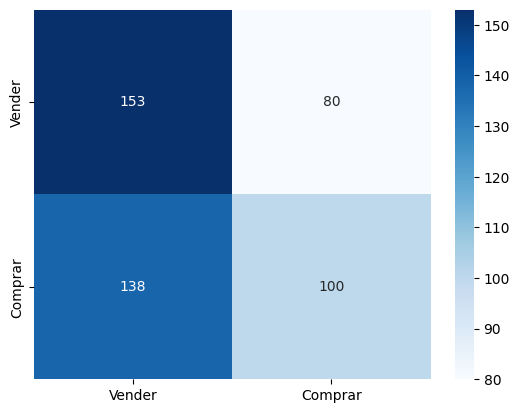

In [23]:
################ TUNNING NO MODELO ################
# PERCORRER MODELOS
for nome_modelo in modelos:
    modelo = modelos[nome_modelo]
    modelo.fit(x_treino,y_treino)
    previsoes  = modelo.predict(x_teste)
    avaliar (y_teste,previsoes,nome_modelo)
    # SUBSTITUIR MODELO JA TREINADO AQUI 
    modelos[nome_modelo] = modelo

   
    

In [30]:
# APÓS TER ESCOLHIDO O MELHOR MODELO (>Precision e >Recall para desempate))
# ESSE PROCESSO TEM UMA MÉDIA DE 20 MINUTOS PARA TREINAR CADA IA
################ TUNNING O MODELO (MUDAR PARAMETROS) ################
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, precision_score

modelo_final = modelos["SVM"]
param_grid = {
    'C': range(10, 251, 30),    # Substituindo `n_estimatiors`
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Adicionando kernels como diferentes características
    'gamma': ['scale', 'auto']  # Parâmetro gamma como proxy para `max_features`
}

precision2_score = make_scorer(precision_score, labels=[2], avarege= 'macro')
grid = GridSearchCV(
    estimator=modelo_final,
    param_grid=param_grid,
    scoring=precision2_score,
    cv=5  # Número de folds para cross-validation
)

resultado_grid = grid.fit(x_treino,y_treino)
print("Ajuste Feito")

c:\Users\WIN11\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\WIN11\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\WIN11\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "c:\Users\WIN11\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "c:\Users\WIN11\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\_param_validation.py", line

Ajuste Feito
